In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import timedelta
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/aggregate_covid_country.csv")

In [3]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
data['Country'].nunique()

188

- We can see that we are analysing the covid data for 188 different countries

In [5]:
# Checking for the null values
data.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [6]:
data.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

 - As we can see the Date column is a categorical column, so lets change it to Datetime

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
# Changed the Date column from object type to datetime
data['Date']


0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
23683   2020-05-26
23684   2020-05-26
23685   2020-05-26
23686   2020-05-26
23687   2020-05-26
Name: Date, Length: 23688, dtype: datetime64[ns]

In [9]:
# Let's get the insight of the data
# So I am going to group total Confirmed, Recovered and Death Cases as we move down the date

df = data.groupby(['Date']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [10]:
# Important Outcomes from the Dataset
print("The total number of Covid cases accross the world is ", df['Confirmed'].iloc[-1])
print("The total number of Recovered cases accross the world is ", df['Recovered'].iloc[-1])
print("The total number of Death cases accross the world is ", df['Deaths'].iloc[-1])
print("The total number of Active cases accross the world is ", (df['Confirmed'].iloc[-1]-df['Recovered'].iloc[-1]-df['Deaths'].iloc[-1]))
print("The total number of closed cases accross the world is ", (df['Recovered'].iloc[-1]+df['Deaths'].iloc[-1]))

The total number of Covid cases accross the world is  5589626
The total number of Recovered cases accross the world is  2286956
The total number of Death cases accross the world is  350453
The total number of Active cases accross the world is  2952217
The total number of closed cases accross the world is  2637409


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

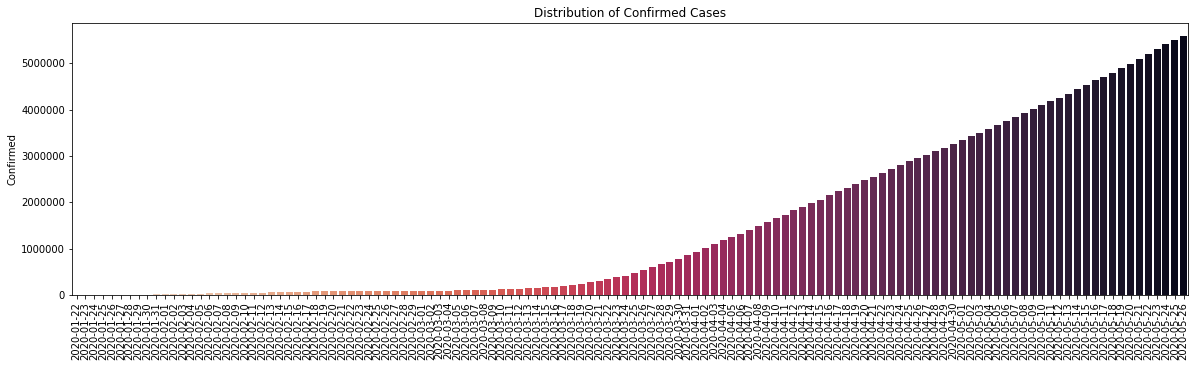

In [11]:
# Plotting the total confirmed cases in world
plt.figure(figsize=(20,5))
sns.barplot(x=df.index.date,y=df['Confirmed'],palette='rocket_r')
plt.title("Distribution of Confirmed Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

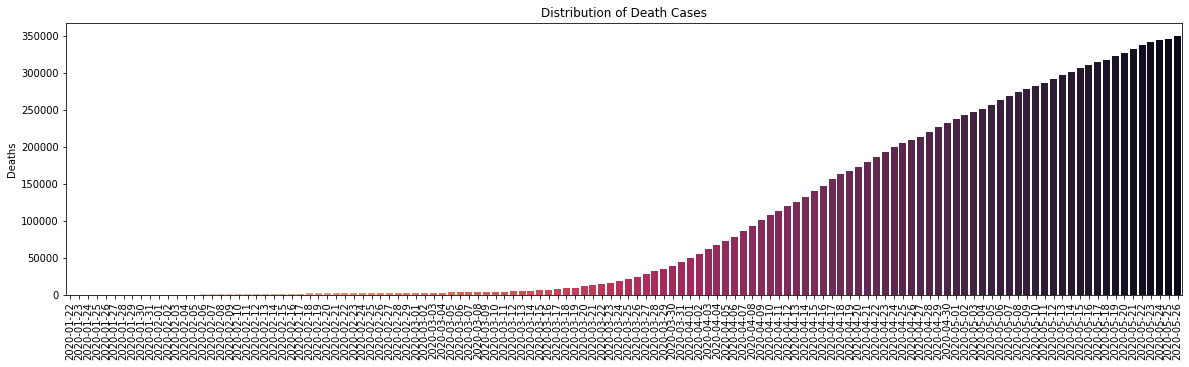

In [12]:
# Plotting total Death cases around the world
plt.figure(figsize=(20,5))
sns.barplot(x=df.index.date,y=df['Deaths'],palette='rocket_r')
plt.title("Distribution of Death Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

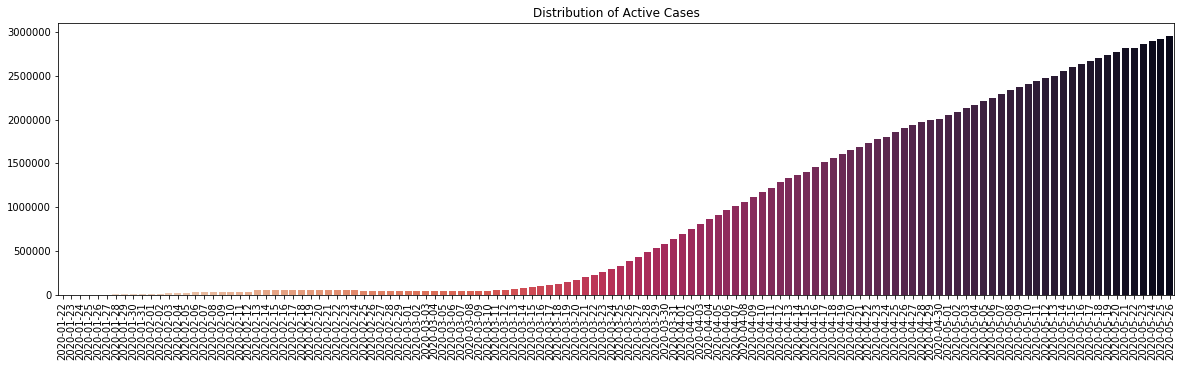

In [13]:
# Plotting total Active cases around the world
plt.figure(figsize=(20,5))
sns.barplot(x=df.index.date,y=df['Confirmed']-df['Recovered']-df['Deaths'],palette='rocket_r')
plt.title("Distribution of Active Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

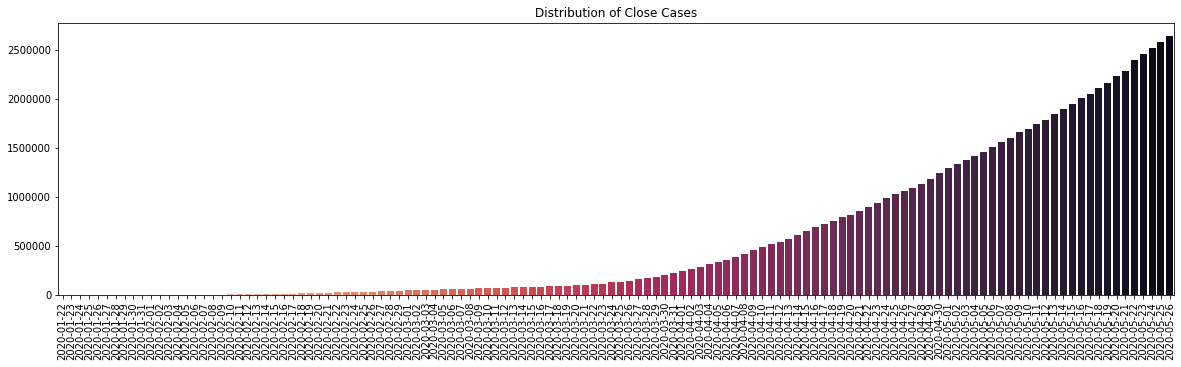

In [14]:
# Plotting the death cases around the world
plt.figure(figsize=(20,5))
sns.barplot(x=df.index.date,y=df['Recovered']+df['Deaths'],palette='rocket_r')
plt.title("Distribution of Close Cases")
plt.xticks(rotation=90)

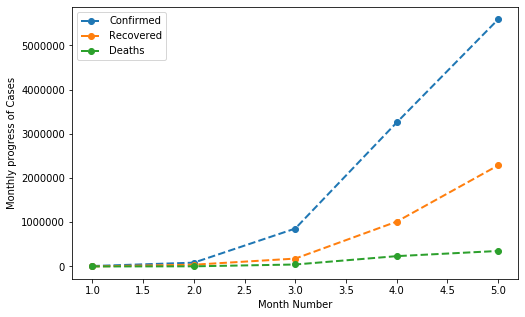

In [15]:
df['Month_of_year'] = df.index.month
month_num = []
month_wise_confirmed = []
month_wise_recovered = []
month_wise_deaths = []
M=1
for i in list(df['Month_of_year'].unique()):
    month_wise_confirmed.append(df[df['Month_of_year']==i]['Confirmed'].iloc[-1])
    month_wise_recovered.append(df[df['Month_of_year']==i]['Recovered'].iloc[-1])    
    month_wise_deaths.append(df[df['Month_of_year']==i]['Deaths'].iloc[-1])
    month_num.append(M)
    M = M+1
plt.figure(figsize=(8,5))
plt.plot(month_num,month_wise_confirmed,linestyle='dashed',marker='o',linewidth=2,label='Confirmed')
plt.plot(month_num,month_wise_recovered,linestyle='dashed',marker='o',linewidth=2,label='Recovered')
plt.plot(month_num,month_wise_deaths,linestyle='dashed',marker='o',linewidth=2,label='Deaths')
plt.xlabel("Month Number")
plt.ylabel("Monthly progress of Cases")
plt.legend()
plt.show()

- In the above plot we can see how there is a rapid increase in the number of Confirmed cases around the world

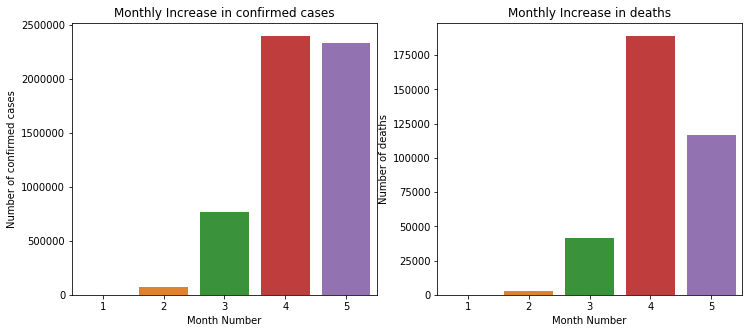

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.barplot(x=month_num,y=pd.Series(month_wise_confirmed).diff(),ax=ax1)
sns.barplot(x=month_num,y=pd.Series(month_wise_deaths).diff(),ax=ax2)
ax1.set_xlabel("Month Number")
ax2.set_xlabel("Month Number")
ax1.set_ylabel("Number of confirmed cases")
ax2.set_ylabel("Number of deaths")
ax1.set_title("Monthly Increase in confirmed cases")
ax2.set_title("Monthly Increase in deaths")
plt.show()

- The above two subplots shows number of number of confirmed and death cases around the world.

In [17]:
# Basic Information
print("Average increase in number of Confirmed cases everyday:",np.round(df["Confirmed"].diff().mean()))
print("Average increase in number of Recovered cases everyday:",np.round(df["Recovered"].diff().mean()))
print("Average increase in number of Death cases everyday:",np.round(df["Deaths"].diff().mean()))

Average increase in number of Confirmed cases everyday: 44713.0
Average increase in number of Recovered cases everyday: 18295.0
Average increase in number of Death cases everyday: 2803.0


Text(0.5, 1.0, 'Top 10 countries as per number of death cases')

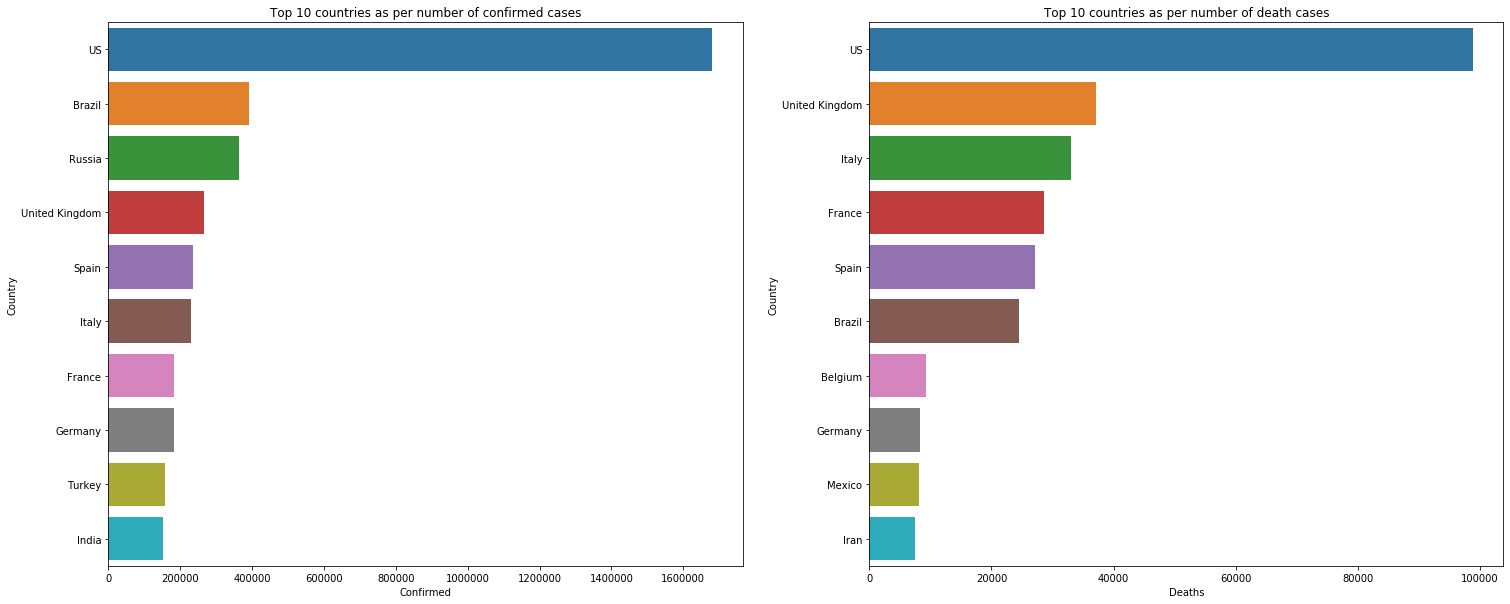

In [18]:
# Top 10 countries with maximum cases of covid and maximum deaths due to covid

asc= data[data["Date"]==data["Date"].max()].groupby(["Country"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
top_10confirmed = asc.sort_values(["Confirmed"],ascending=False).head(10)
top_10deaths = asc.sort_values(["Deaths"],ascending=False).head(10)
top_10recover = top_15recover = asc.sort_values(["Recovered"],ascending=False).head(10)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
sns.barplot(x=top_10confirmed["Confirmed"],y=top_10confirmed.index,ax=ax1)
ax1.set_title("Top 10 countries as per number of confirmed cases")
sns.barplot(x=top_10deaths["Deaths"],y=top_10deaths.index,ax=ax2)
ax2.set_title("Top 10 countries as per number of death cases")

Text(0.5, 1.0, 'Top 10 countries as per number of recovered cases')

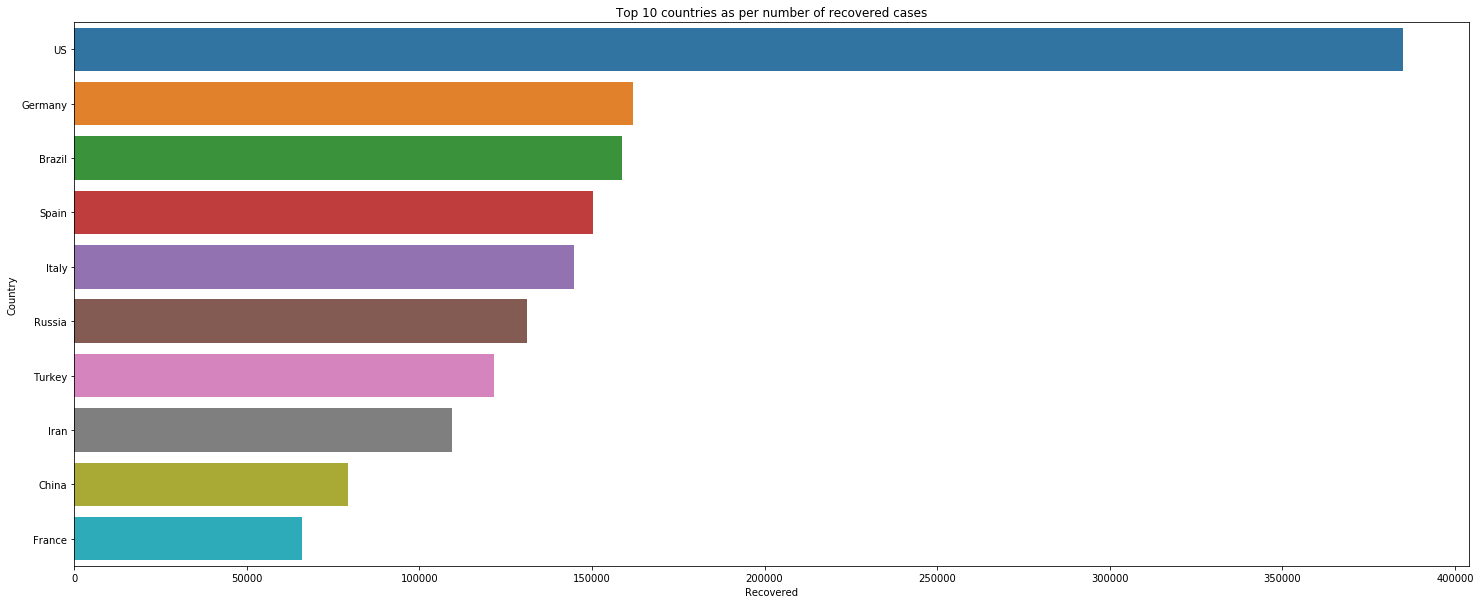

In [19]:
# Top 10 countries with as per number of recovered cases

fig,(ax3)=plt.subplots(1,figsize=(25,10))
sns.barplot(x=top_10recover["Recovered"],y=top_10recover.index,ax=ax3)
ax3.set_title("Top 10 countries as per number of recovered cases")

# Analysis of India

In [20]:
df_india = data[data['Country'] == 'India']
print(df_india.head())

          Date Country  Confirmed  Recovered  Deaths
79  2020-01-22   India          0          0       0
267 2020-01-23   India          0          0       0
455 2020-01-24   India          0          0       0
643 2020-01-25   India          0          0       0
831 2020-01-26   India          0          0       0


In [21]:
df3 = df_india.groupby(['Date']).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [22]:
print("The total number of Covid cases accross India is ", df3['Confirmed'].iloc[-1])
print("The total number of Recovered cases accross India is ", df3['Recovered'].iloc[-1])
print("The total number of Death cases accross India is ", df3['Deaths'].iloc[-1])
print("The total number of Active cases accross india is ", (df3['Confirmed'].iloc[-1]-df3['Recovered'].iloc[-1]-df3['Deaths'].iloc[-1]))
print("The total number of closed cases accross India is ", (df3['Recovered'].iloc[-1]+df3['Deaths'].iloc[-1]))

The total number of Covid cases accross India is  150793
The total number of Recovered cases accross India is  64277
The total number of Death cases accross India is  4344
The total number of Active cases accross india is  82172
The total number of closed cases accross India is  68621


In [23]:
print("Average increase in number of Confirmed cases everyday in India is :",np.round(df3["Confirmed"].diff().mean()))
print("Average increase in number of Recovered cases everyday in india is :",np.round(df3["Recovered"].diff().mean()))
print("Average increase in number of Death cases everyday in India is :",np.round(df3["Deaths"].diff().mean()))

Average increase in number of Confirmed cases everyday in India is : 1206.0
Average increase in number of Recovered cases everyday in india is : 514.0
Average increase in number of Death cases everyday in India is : 35.0


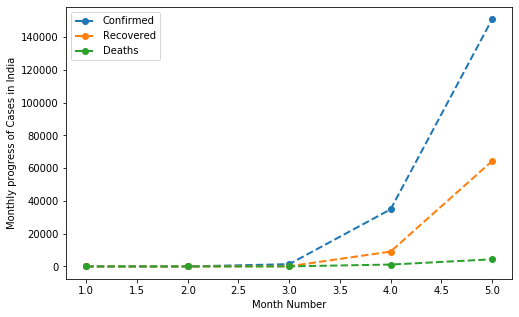

In [24]:
df3['Month_of_year'] = df3.index.month
Month_num = []
Month_wise_confirmed = []
Month_wise_recovered = []
Month_wise_deaths = []
n=1
for i in list(df3['Month_of_year'].unique()):
    Month_wise_confirmed.append(df3[df3['Month_of_year']==i]['Confirmed'].iloc[-1])
    Month_wise_recovered.append(df3[df3['Month_of_year']==i]['Recovered'].iloc[-1])    
    Month_wise_deaths.append(df3[df3['Month_of_year']==i]['Deaths'].iloc[-1])
    Month_num.append(n)
    n = n+1
plt.figure(figsize=(8,5))
plt.plot(Month_num,Month_wise_confirmed,linestyle='dashed',marker='o',linewidth=2,label='Confirmed')
plt.plot(Month_num,Month_wise_recovered,linestyle='dashed',marker='o',linewidth=2,label='Recovered')
plt.plot(Month_num,Month_wise_deaths,linestyle='dashed',marker='o',linewidth=2,label='Deaths')
plt.xlabel("Month Number")
plt.ylabel("Monthly progress of Cases in India")
plt.legend()
plt.show()

- In the above plot we can see how there is a sudden increase in the number of Confirmed cases from the 3rd month in India

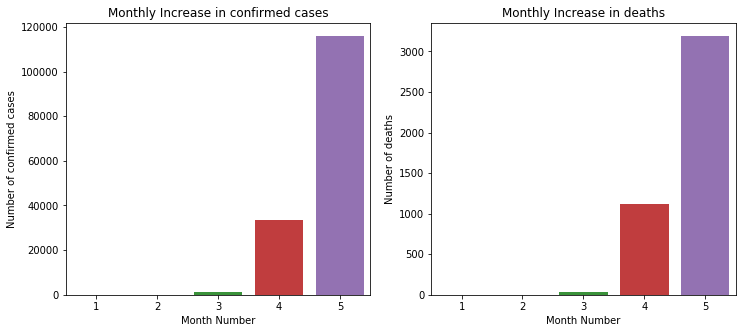

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.barplot(x=Month_num,y=pd.Series(Month_wise_confirmed).diff(),ax=ax1)
sns.barplot(x=Month_num,y=pd.Series(Month_wise_deaths).diff(),ax=ax2)
ax1.set_xlabel("Month Number")
ax2.set_xlabel("Month Number")
ax1.set_ylabel("Number of confirmed cases")
ax2.set_ylabel("Number of deaths")
ax1.set_title("Monthly Increase in confirmed cases")
ax2.set_title("Monthly Increase in deaths")
plt.show()

- Month-wise cases in India

# Building the Model

In [26]:
df2 = data.copy()

In [27]:
# Extracting year, Month, Week from the Date column
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Week'] = df2['Date'].dt.week
df2.head()

,Date,Country,Confirmed,Recovered,Deaths,Year,Month,Week
0,2020-01-22,Afghanistan,0,0,0,2020,1,4
1,2020-01-22,Albania,0,0,0,2020,1,4
2,2020-01-22,Algeria,0,0,0,2020,1,4
3,2020-01-22,Andorra,0,0,0,2020,1,4
4,2020-01-22,Angola,0,0,0,2020,1,4


In [28]:
# Dropping the date column as we have extracted the Year, month, week in seperate columns respectively
df2.drop('Date',axis=1,inplace=True)
df2.head()

,Country,Confirmed,Recovered,Deaths,Year,Month,Week
0,Afghanistan,0,0,0,2020,1,4
1,Albania,0,0,0,2020,1,4
2,Algeria,0,0,0,2020,1,4
3,Andorra,0,0,0,2020,1,4
4,Angola,0,0,0,2020,1,4


In [29]:
# Encoding the Country and Year column
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['Country','Year']
for i in variable:
    df2[i] = lb.fit_transform(df2[i])

In [30]:
df2 = pd.get_dummies(df2,columns=['Country','Year'])
df2.dtypes

Confirmed      int64
Recovered      int64
Deaths         int64
Month          int64
Week           int64
               ...  
Country_184    uint8
Country_185    uint8
Country_186    uint8
Country_187    uint8
Year_0         uint8
Length: 194, dtype: object

In [31]:
df2.shape

(23688, 194)

In [32]:
# Features and Target variable
X = df2.drop('Deaths',axis=1)
y = df2['Deaths']

In [33]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lr_pred = lr.predict(X_test)
lr_pred

array([1769.77333212,  -46.30298328,  -39.51275158, ..., -119.44664478,
       1914.12762451,   97.76405621])

In [36]:
#Cross-Validating the Model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X_train, y_train, scoring='r2', cv=3)
scores 

array([0.91764441, 0.92320107, 0.90511489])

In [37]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.02)
